# data preprocessing 

In [ ]:
# Copy the script code here
import pandas as pd
import numpy as np

def handle_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical data
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:  # Numerical data
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
    return df

def handle_outliers(df):
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, df[column].mean(),
                             np.where(df[column] > upper_bound, df[column].mean(), df[column]))
    return df

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def clean_data(file_path, output_file_path):
    df = load_data(file_path)
    df = handle_missing_values(df)
    df = handle_outliers(df)
    df.to_csv(output_file_path, index=False)
    return df

# Now call clean_data
file_path = '../assets/data/Copy of Week2_challenge_data_source(CSV).csv'  # Replace with your file path
output_file_path = '../assets/data/cleaned_dataset_Week2.csv'
cleaned_df = clean_data(file_path, output_file_path)

# Display the cleaned data
cleaned_df.head()


/tmp/ipykernel_7447/4196217215.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)
/tmp/ipykernel_7447/4196217215.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,104608.560347,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,104608.560347,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,104608.560347,2.082016e+14,4.188282e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,104608.560347,2.082014e+14,4.188282e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,104608.560347,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# aggregation 

In [8]:
import pandas as pd

# Load the dataset
file_path = '../assets/data/cleaned_dataset_Week2.csv' 
df = pd.read_csv(file_path)

# Ensure the dataset has the required columns
required_columns = ['Bearer Id', 'Handset Type',]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")
# Calculate Total TCP Retransmission Volume
df['Total_TCP_Retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['Average_RTT_Retransmission'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2

df['DL_Average_TP'] = df[['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)']].mean(axis=1)

# Calculate the average Uplink Throughput Duration Ratio
df['UL_Average_TP'] = df[['UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']].mean(axis=1)

# Calculate the weighted throughput (using the BDR duration and average throughput)
df['Weighted_DL_TP'] = df['Avg Bearer TP DL (kbps)'] * df['DL_Average_TP']
df['Weighted_UL_TP'] = df['Avg Bearer TP UL (kbps)'] * df['UL_Average_TP']

# Calculate overall average throughput based on weighted values
df['Average_Throughput'] = (df['Weighted_DL_TP'] + df['Weighted_UL_TP']) / (df['DL_Average_TP'] + df['UL_Average_TP'])



# Group by Customer_ID and calculate the required metrics
aggregated_data = df.groupby('Bearer Id').agg(
    Average_TCP_Retransmission=('Total_TCP_Retransmission', 'mean'),
    Average_RTT=('Average_RTT_Retransmission', 'mean'),
    Handset_Type=('Handset Type', lambda x: x.mode()[0] if not x.mode().empty else None),  # Mode for handset
    Average_Throughput=('Average_Throughput', 'mean')
).reset_index()

# Save the aggregated data to a new CSV file
output_file = "../assets/data/aggregated_data.csv"  # Replace with your desired output file path
aggregated_data.to_csv(output_file, index=False)

# Display the first few rows of the aggregated data
print(aggregated_data.head())


      Bearer Id  Average_TCP_Retransmission  Average_RTT  \
0  6.917538e+18                1.452700e+05    59.897853   
1  6.917538e+18                2.156957e+07    63.729294   
2  6.917538e+18                6.453200e+04    55.397853   
3  6.917538e+18                4.722720e+05    60.397853   
4  6.917538e+18                9.789640e+05    55.897853   

                  Handset_Type  Average_Throughput  
0               Huawei P8 Lite          213.000000  
1                    undefined           14.500000  
2  Sony Mobile Comm. Xperia L1         1236.000000  
3  Sony Mobile Comm. Xperia L1          560.130653  
4       Apple iPhone 7 (A1778)         2550.932002  


# 10 of the top TCP,RTT AND TP

In [9]:
import pandas as pd

# Load the dataset
file_path = '../assets/data/cleaned_dataset_Week2.csv'   
df = pd.read_csv(file_path)

# Ensure the dataset has the required columns (adjust as per your dataset)
tcp_downlink_column = 'TCP DL Retrans. Vol (Bytes)' 
tcp_uplink_column = 'TCP UL Retrans. Vol (Bytes)'  
rtt_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)'] 
throughput_columns = ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']  


# Get top 10 TCP retransmissions (highest values) for both Downlink and Uplink
top_10_tcp_downlink = df[tcp_downlink_column].nlargest(10)
top_10_tcp_uplink = df[tcp_uplink_column].nlargest(10)

# Get bottom 10 TCP retransmissions (lowest values) for both Downlink and Uplink
bottom_10_tcp_downlink = df[tcp_downlink_column].nsmallest(10)
bottom_10_tcp_uplink = df[tcp_uplink_column].nsmallest(10)

# Get most frequent TCP retransmissions for both Downlink and Uplink
most_frequent_tcp_downlink = df[tcp_downlink_column].mode().head(10)
most_frequent_tcp_uplink = df[tcp_uplink_column].mode().head(10)

# --- For RTT values ---
# Get top 10 RTT (highest values)
top_10_rtt = df[rtt_columns].max().nlargest(10)

# Get bottom 10 RTT (lowest values)
bottom_10_rtt = df[rtt_columns].min().nsmallest(10)

# Get most frequent RTT
most_frequent_rtt = df[rtt_columns].mode().head(10)

# --- For Throughput values ---
# Get top 10 Throughput values (highest values)
top_10_throughput = df[throughput_columns].max().nlargest(10)

# Get bottom 10 Throughput values (lowest values)
bottom_10_throughput = df[throughput_columns].min().nsmallest(10)

# Get most frequent Throughput values
most_frequent_throughput = df[throughput_columns].mode().head(10)

# Display the results
print("Top 10 TCP retransmission values (Downlink):")
print(top_10_tcp_downlink)

print("\nTop 10 TCP retransmission values (Uplink):")
print(top_10_tcp_uplink)

print("\nBottom 10 TCP retransmission values (Downlink):")
print(bottom_10_tcp_downlink)

print("\nBottom 10 TCP retransmission values (Uplink):")
print(bottom_10_tcp_uplink)

print("\nMost frequent TCP retransmission values (Downlink):")
print(most_frequent_tcp_downlink)

print("\nMost frequent TCP retransmission values (Uplink):")
print(most_frequent_tcp_uplink)

print("\nTop 10 RTT values:")
print(top_10_rtt)

print("\nBottom 10 RTT values:")
print(bottom_10_rtt)

print("\nMost frequent RTT values:")
print(most_frequent_rtt)

print("\nTop 10 Throughput values:")
print(top_10_throughput)

print("\nBottom 10 Throughput values:")
print(bottom_10_throughput)

print("\nMost frequent Throughput values:")
print(most_frequent_throughput)


Top 10 TCP retransmission values (Downlink):
6395      50021024.0
138714    49991791.0
66750     49986834.0
136230    49986038.0
76014     49969605.0
77812     49921268.0
143262    49833677.0
116514    49779123.0
9704      49777538.0
139859    49663906.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Top 10 TCP retransmission values (Uplink):
77865     1804466.0
141546    1804062.0
78464     1803636.0
45460     1800574.0
1503      1799642.0
137154    1798195.0
91545     1797950.0
825       1797350.0
149560    1796745.0
77213     1796464.0
Name: TCP UL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP retransmission values (Downlink):
59708     2.0
125088    2.0
2818      4.0
39582     4.0
52480     4.0
60366     4.0
60417     4.0
75082     4.0
100305    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP retransmission values (Uplink):
13260     1.0
15237     1.0
36067     1.0
38380     1.0
75076     1.0
78672     1.0
90210     1.0
124047    1.0
138

# distribution of the average throughput per handset type

Average Throughput per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                            6925.022963
A-Link Telecom I. Cubot Power                                                           6821.022963
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              20755.714323
Zyxel Communicat. Sbg3600                                                               7535.237287
Zyxel Communicat. Zyxel Wah7706                   

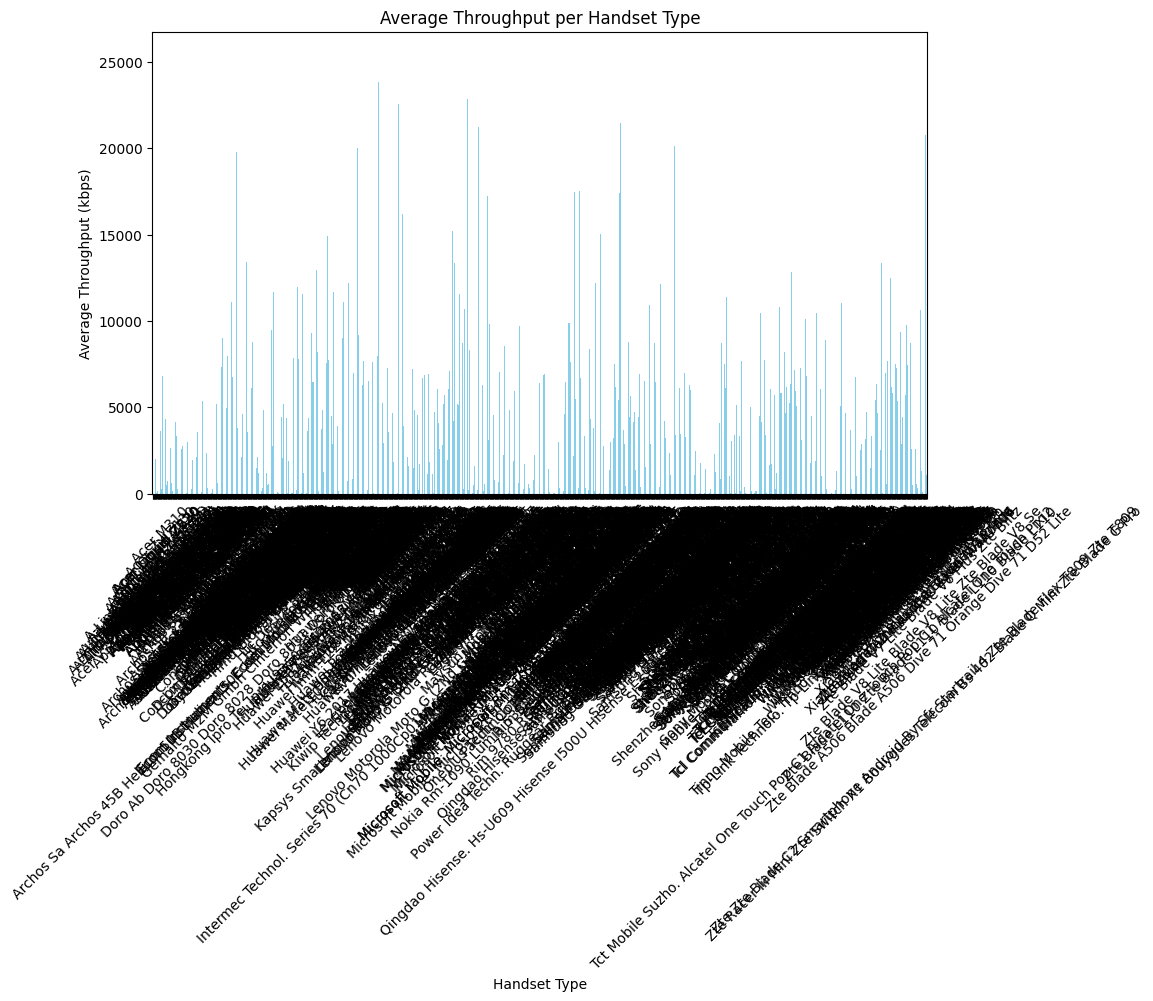

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../assets/data/cleaned_dataset_Week2.csv'  
df = pd.read_csv(file_path)


handset_type_column = 'Handset Type' 
throughput_dl_column = 'Avg Bearer TP DL (kbps)'  
throughput_ul_column = 'Avg Bearer TP UL (kbps)'  

# --- Compute the average throughput for each handset type ---
# Group by handset type and calculate average throughput for Downlink and Uplink
df['Average_Throughput'] = (df[throughput_dl_column] + df[throughput_ul_column]) / 2

# Group by handset type and calculate the mean average throughput
average_throughput_per_handset = df.groupby(handset_type_column)['Average_Throughput'].mean()

# Display the results
print("Average Throughput per Handset Type:")
print(average_throughput_per_handset)




# Plot the distribution
plt.figure(figsize=(10, 6))
average_throughput_per_handset.plot(kind='bar', color='skyblue')
plt.title('Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.xticks(rotation=45)
plt.show()


# average TCP retransmission view per handset type

Average TCP Retransmission Volume per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             2.156957e+07
A-Link Telecom I. Cubot Note Plus                                                      6.162130e+05
A-Link Telecom I. Cubot Note S                                                         4.141173e+07
A-Link Telecom I. Cubot Nova                                                           1.371700e+05
A-Link Telecom I. Cubot Power                                                          8.041000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.116595e+07
Zyxel Communicat. Lte7460                                                              2.460269e+07
Zyxel Communicat. Sbg3600                                                              2.156957e+07
Zyxel Communicat. Zyxel Wah7706    

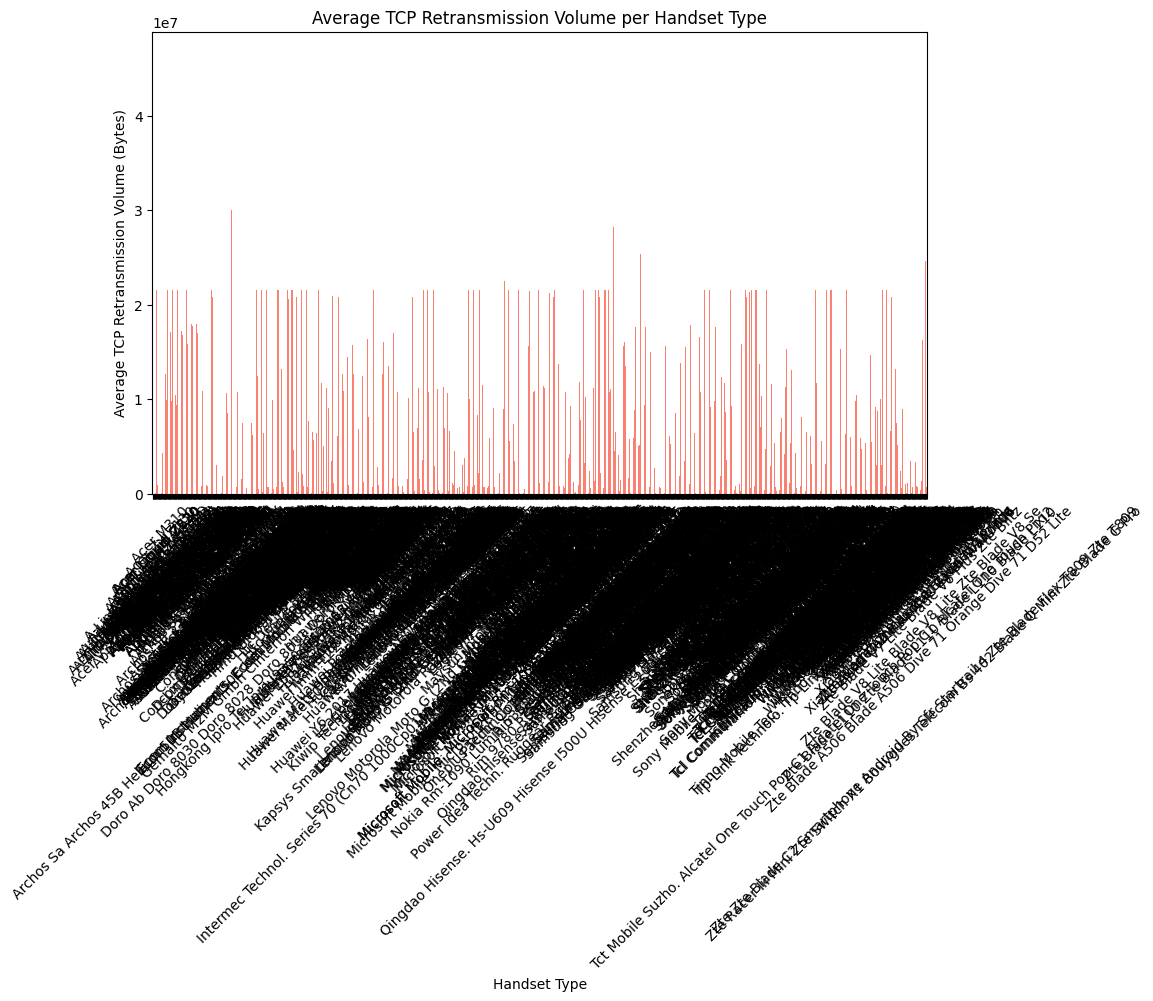

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../assets/data/cleaned_dataset_Week2.csv'  
df = pd.read_csv(file_path)

# Ensure the dataset has the required columns (adjust as per your dataset)
handset_type_column = 'Handset Type'  
tcp_dl_retrans_column = 'TCP DL Retrans. Vol (Bytes)'  
tcp_ul_retrans_column = 'TCP UL Retrans. Vol (Bytes)'  

# --- Compute the total TCP retransmission volume for each row (both DL and UL) ---
df['Total_TCP_Retrans_Vol'] = df[tcp_dl_retrans_column] + df[tcp_ul_retrans_column]

# --- Compute the average TCP retransmission volume per handset type ---
average_tcp_retrans_per_handset = df.groupby(handset_type_column)['Total_TCP_Retrans_Vol'].mean()

# Display the results
print("Average TCP Retransmission Volume per Handset Type:")
print(average_tcp_retrans_per_handset)

# Plot the distribution
plt.figure(figsize=(10, 6))
average_tcp_retrans_per_handset.plot(kind='bar', color='salmon')
plt.title('Average TCP Retransmission Volume per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission Volume (Bytes)')
plt.xticks(rotation=45)
plt.show()


# k-means clustering

Cluster Centroids:
   Average_TCP_Retransmission  Average_RTT  Average_Throughput
0                    0.707908    -0.795682           -0.576042
1                    0.622088     1.232708           -0.426466
2                   -1.238416     0.037025            0.951803


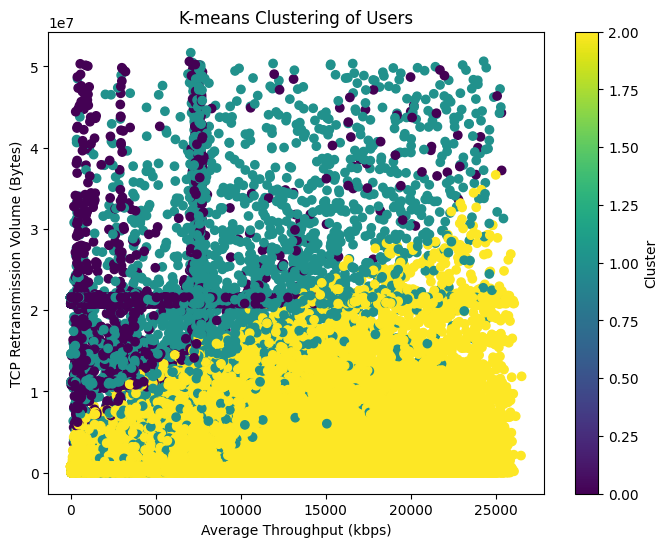


Cluster Summary (Mean values of metrics):
         Average_TCP_Retransmission  Average_RTT  Average_Throughput
Cluster                                                             
0                      2.149627e+07    21.349946          421.498693
1                      2.064230e+07    65.010918         1372.051897
2                      2.688610e+06    39.222800        10065.769615


In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the aggregated dataset
file_path = '../assets/data/aggregated_data.csv'  
df = pd.read_csv(file_path)


# Prepare the feature set for clustering ---
features = ['Average_TCP_Retransmission', 'Average_RTT', 'Average_Throughput']

#  Normalize the features using StandardScaler ---
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

#  Apply K-means clustering with k=3 ---
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

#  Display the cluster centroids ---
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(pd.DataFrame(centroids, columns=features))

# --- Step 6: Visualize the clustering (optional) ---
plt.figure(figsize=(8, 6))
plt.scatter(df['Average_Throughput'], df['Average_TCP_Retransmission'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Users')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('TCP Retransmission Volume (Bytes)')
plt.colorbar(label='Cluster')
plt.show()

# --- Step 7: Summarize each cluster ---
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Summary (Mean values of metrics):")
print(cluster_summary)
